# Agglomerative Clustering

### Pros:
1\. **No Need to Specify k**: Can determine the number of clusters by analyzing the dendrogram.  
2\. **Flexible Linkage Criteria**: Multiple strategies available for different types of data.  
3\. **Good for Nested Structures**: Captures hierarchical relationships.  
4\. **Deterministic**: Always produces the same results (no randomness).  

### Cons:
1\. **Computationally Expensive**: $`O(n^3)`$ time complexity for naïve implementations.  
2\. **Not Scalable**: Inefficient for very large datasets.  
3\. **Sensitive to Noise and Outliers**: Can distort the clustering structure.  
4\. **Greedy Merges are Irreversible**: Early incorrect merges can't be undone.

**In scikit-lear**: 
### Ward
The default choice, ward picks the two clusters to merge such that the variance within all clusters increases the least. This often leads to **clusters that are relatively equally sized.**
### Average
Average linkage merges the two clusters that have the smallest average distance between all their points.
### Complete
Complete linkage (also known as maximum linkage) merges the two clusters that have the smallest maximum distance between their points.

In [2]:
#Imports
import mglearn
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt


Text(0, 0.5, 'Feature 1')

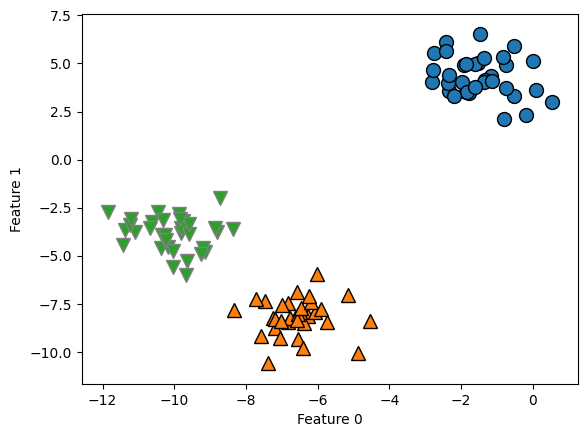

In [3]:
X, y = make_blobs(random_state=1)
agg = AgglomerativeClustering(n_clusters=3)
assignment = agg.fit_predict(X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], assignment)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Hierarchical clustering and dendrograms

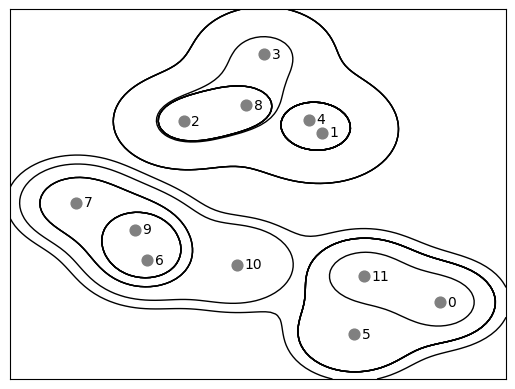

In [5]:
#shows an overlay of all the possible clusterings providing some insight intohow each cluster breaks up into smaller clusters:
mglearn.plots.plot_agglomerative()

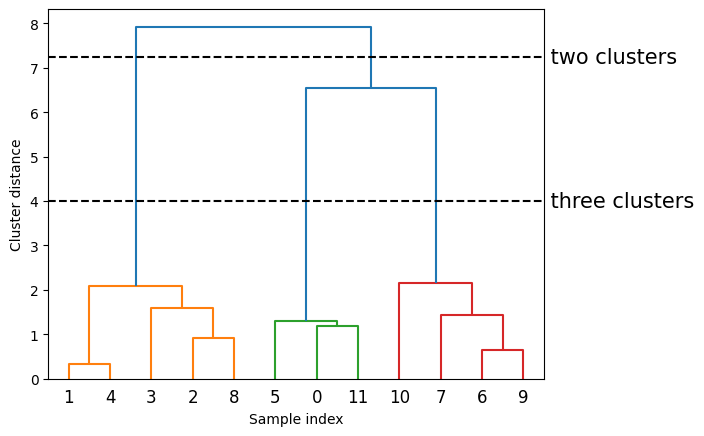

In [6]:
from scipy.cluster.hierarchy import dendrogram, ward
X, y = make_blobs(random_state=0, n_samples=12)
# Apply the ward clustering to the data array X
# The SciPy ward function returns an array that specifies the distances
# bridged when performing agglomerative clustering
linkage_array = ward(X)
# Now we plot the dendrogram for the linkage_array containing the distances
# between clusters
dendrogram(linkage_array)
# Mark the cuts in the tree that signify two or three clusters
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [7.25, 7.25], '--', c='k')
ax.plot(bounds, [4, 4], '--', c='k')
ax.text(bounds[1], 7.25, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 4, ' three clusters', va='center', fontdict={'size': 15})
plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()